In [1]:
import geopandas
from urllib.request import urlopen
import json
import pandas
from datetime import date, timedelta
import matplotlib
import matplotlib.pyplot as plt
import numpy as np




/Users/chris.porter/Library/Caches/pypoetry/virtualenvs/evmap-R_B4Wazy-py3.9/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import fiona;
fiona.supported_drivers


{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [3]:
def load_geodataset(remote_path, local_path, refresh_cache=False):
    df = None
    if not refresh_cache:
        try:
            df = geopandas.read_file(local_path)
        except Exception as e:
            print(e)
    
    if df is None:
        print(f"Loading {remote_path}")
        df = geopandas.read_file(remote_path)
        print(f"Saving to {local_path}")
        df.to_file(local_path)

    return df

In [4]:
def get_roads(refresh_cache=False):
    # Doesn't quite work as it needs unzipping
    remote_path = "https://www12.statcan.gc.ca/census-recensement/2011/geo/RNF-FRR/files-fichiers/lrnf000r22g_e.zip"
    local_path = "data/lrnf000r22g_e/lrnf000r22g_e.gml"
    return load_geodataset(remote_path, local_path, refresh_cache)


In [5]:
def get_highways(refresh_cache=False, columns=["NAME", "TYPE", "CSDNAME_R", "PRNAME_L", "geometry"]):
    local_path = "data/highways.shp"
    
    roads = None
    if not refresh_cache:
        try:
            roads = geopandas.read_file(local_path)
        except Exception as e:
            print(e)
    
    if roads is None:
        roads = get_roads(refresh_cache)
    
    highways = roads.query('RANK <= "2"')
    
    print(f"Saving to {local_path}")
    highways.to_file(local_path)

    return highways[columns]


In [6]:
highways = get_highways()
highways

Saving to data/highways.shp


,NAME,TYPE,CSDNAME_R,PRNAME_L,geometry
0,Trans-Canada,HWY,Oyster Bay 12,British Columbia / Colombie-Britannique,"LINESTRING (3957674.009 2006683.543, 3957661.5..."
1,11+17,HWY,Shuniah,Ontario,"LINESTRING (6425205.060 1387179.180, 6425317.6..."
2,69,HWY,"Parry Sound, Unorganized, Centre Part",Ontario,"LINESTRING (7081874.837 1171112.237, 7081821.1..."
3,Alaska,HWY,"Yukon, Unorganized",Yukon,"LINESTRING (4140143.634 3372299.660, 4140150.7..."
4,2,RTE,Woodstock,New Brunswick / Nouveau-Brunswick,"LINESTRING (8052327.046 1464912.366, 8052328.0..."
...,...,...,...,...,...
65034,40,AUT,Maskinongé,Quebec / Québec,"LINESTRING (7652138.046 1332892.443, 7653290.3..."
65035,Yellowhead,HWY,Fraser-Fort George H,British Columbia / Colombie-Britannique,"LINESTRING (4411524.720 2290441.177, 4411650.6..."
65036,Cariboo,HWY,Williams Lake,British Columbia / Colombie-Britannique,"LINESTRING (4226860.526 2253233.871, 4226903.0..."
65037,16,HWY,Bulkley-Nechako A,British Columbia / Colombie-Britannique,"LINESTRING (4090572.786 2644309.069, 4090649.5..."


<AxesSubplot:>

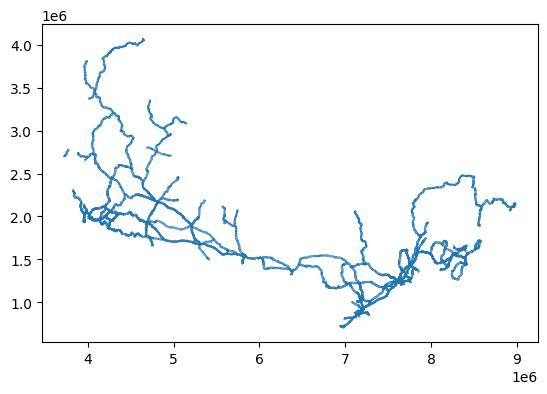

In [7]:
highways.plot()

In [8]:
def get_provinces(refresh_cache=False):
    # Doesn't quite work as it needs unzipping
    remote_path = "https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lpr_000b16a_e.zip"
    local_path = "data/lpr_000b16a_e/lpr_000b16a_e.shp"
    return load_geodataset(remote_path, local_path, refresh_cache)

<AxesSubplot:>

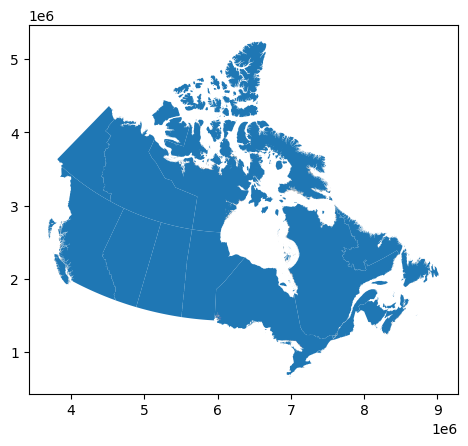

In [9]:
provinces = get_provinces()
provinces.plot()

In [10]:
# connector_type: [all, NEMA1450, NEMA515,NEMA520,J1772,J1772COMBO,CHADEMO,TESLA
def get_stations(connector_type="J1772COMBO", refresh_cache=False):
    remote_path=f"https://developer.nrel.gov/api/alt-fuel-stations/v1.geojson?api_key=JDgwj9XoVgfg8ryEgz1AOnnBbfoLATWjy4x6dOlv&country=CA&owner_type=all&cards_accepted=all&offset=0&fuel_type=ELEC&access=public&status=E&ev_charging_level=dc_fast&ev_connector_type={connector_type}&ev_network=all"
    local_path=f"data/stations_{connector_type}.shp"

    stations = None
    if not refresh_cache:
        try:
            stations = geopandas.read_file(local_path)
        except Exception as e:
            print(e)
    
    if stations is None:
        print(f"Loading {remote_path}")
        stations = geopandas.read_file(remote_path)
        stations.crs = "EPSG:4326"
        columns=["id", "open_date", "status_code", "station_name",
           "city", "state", "street_address", "ev_network", "geometry"]
        stations = stations.to_crs(highways.crs)[columns]
        print(f"Saving to {local_path}")
        print(stations)
        stations.to_file(local_path)

    return stations

    
    

In [11]:
# Hyudani Kona - CCS Combo - 415 km
# Hyudani Ioniq 5 - CCS Combo - 354 km
# Hyudani Ioniq 5 Long Range - CCS Combo - 488 km
# Nissan Leaf - Chademo 349 km
# Telsa Model 3 Standard Range - 401 km
# Tesla Model 3 Extended Range - 518 km

connector_type="J1772COMBO"
max_range = 415

In [12]:
stations = get_stations(connector_type)
stations

,id,open_date,status_cod,station_na,city,state,street_add,ev_network,geometry
0,83023,2017-02-01,E,IKEA,Burlington,ON,1065 Plains Rd E,Non-Networked,POINT (7195632.491 885288.034)
1,83029,2017-02-15,E,IKEA,Ottawa,ON,2685 Iris St,Non-Networked,POINT (7466504.078 1181063.485)
2,83124,2013-08-15,E,Gus Revenberg Chevrolet Buick GMC,Tecumseh,ON,10150 Tecumseh Rd E,Non-Networked,POINT (6958537.429 728368.251)
3,83230,2015-09-15,E,Petro-Canada,Dorchester,ON,3305 Dorchester Rd,PETROCAN,POINT (7101884.281 825135.206)
4,83232,2015-03-15,E,Petro-Canada,Kingston,ON,1586 Centennial Dr,PETROCAN,POINT (7434713.739 1048262.512)
...,...,...,...,...,...,...,...,...,...
1088,227725,2022-09-13,E,Mobil,Sarnia,ON,600 Murphy Rd,IVY,POINT (6993595.820 810353.239)
1089,227726,2022-09-13,E,Township Of Georgian Bay,Georgian Bay,ON,99 Lone Pine Rd,IVY,POINT (7171347.823 1051729.602)
1090,227727,2022-09-13,E,Tim Hortons,Peterborough,ON,1144 Lansdowne St W,IVY,POINT (7293363.670 1015756.475)
1091,227728,2022-09-13,E,Chase Chamber of Commerce,Chase,BC,400 Shuswap Ave,BCHYDRO,POINT (4313388.364 2049604.600)


In [13]:
stations.to_crs("EPSG:4326").to_file(f"data/stations_map_{connector_type}.geojson")

<AxesSubplot:>

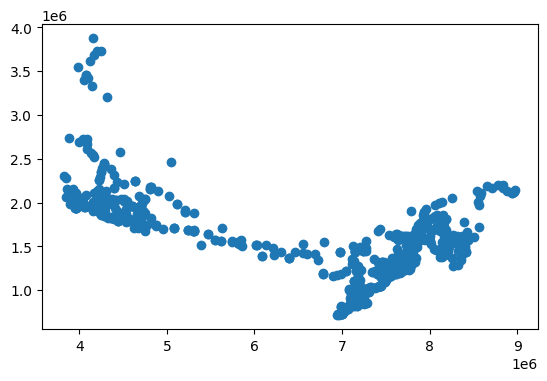

In [14]:
stations.plot()

<AxesSubplot:>

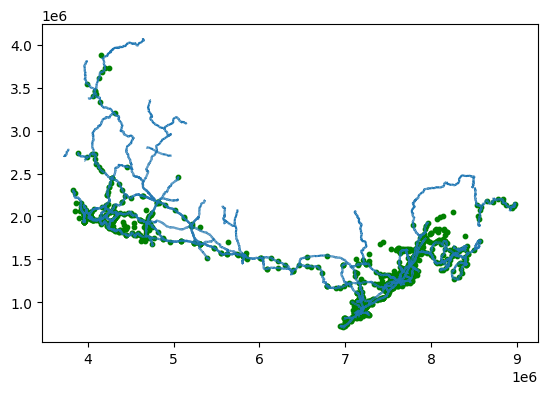

In [15]:
ax = stations.plot(color='g', markersize=10)
highways.plot(ax=ax)

In [16]:
# Method 1 for finding close stations - keep adding adjacent segments next to each EV
def find_stations_old_method():
    close_stations = geopandas.sjoin_nearest(highways, stations[["geometry"]], how='left', distance_col='charger_distance', max_distance=5000)
    close_stations = close_stations.drop(['index_right'], axis=1)

    found = close_stations[close_stations.charger_distance >= 0]
    not_found = close_stations[close_stations.charger_distance.isna()]
    f"{len(found)} / {len(not_found)}"

    changes = True
    tolerance = 0.1
    i = 0

    while changes and len(not_found) > 0:
        adjacent = geopandas.sjoin_nearest(not_found.drop(["charger_distance"], axis=1), found[["geometry", "charger_distance"]], how='left', distance_col='closest_distance', max_distance=tolerance)
        adjacent["charger_distance"] = adjacent["charger_distance"] + adjacent.geometry.length + adjacent["closest_distance"]
        adjacent = adjacent[found.columns]
        changes = len(adjacent[adjacent.charger_distance >= 0]) > 0
        found = pandas.concat([found, adjacent[adjacent.charger_distance >= 0]])
        not_found = adjacent[adjacent.charger_distance.isna()]
        i += 1
        if i % 100 == 0:
            print(f"{len(found)} / {len(not_found)}")
    print(f"{len(found)} / {len(not_found)}")

    not_found["charger_distance"] = 999999
    found = pandas.concat([found, not_found])
    return found

# found = find_stations_old_method()

In [17]:
# Method 2 for finding close stations - look at adjacent stations and find minimum path to a charger
def calculate_ev_highways(stations):
    close_stations = geopandas.sjoin_nearest(highways, stations[["geometry"]], how='left', distance_col='charger_distance', max_distance=5000)
    close_stations = close_stations.drop(['index_right'], axis=1)

    max_distance = 499999 # We don't care about roads more than 500 kms away from a station
    ev_highways = highways.copy()
    ev_highways["charger_distance"] = max_distance

    next_round = close_stations[close_stations["charger_distance"] >= 0]
    ev_highways.loc[next_round.index, "charger_distance"] = next_round["charger_distance"]

    changes = True
    tolerance = 0.1
    i = 0

    while changes:
        adjacent = geopandas.sjoin_nearest(ev_highways[["geometry", "charger_distance"]], next_round, how='left', distance_col="closest_distance", max_distance=tolerance)
        adjacent = adjacent[~adjacent["closest_distance"].isna()]
        adjacent["charger_distance"] = adjacent["charger_distance_right"] + adjacent.geometry.length + adjacent["closest_distance"]
        # Limit adjacents to shortest distance to a charger per segment
        adjacent.sort_values('charger_distance', inplace=True)
        adjacent = adjacent[~adjacent.index.duplicated()]
        # Only consider segments that are now shorter
        next_round = adjacent[adjacent["charger_distance"] < adjacent["charger_distance_left"] ]
        next_round = next_round[ev_highways.columns]
        ev_highways.loc[next_round.index, "charger_distance"] = next_round["charger_distance"]
        
        changes = len(next_round) > 0
        sum_distance = ev_highways["charger_distance"].sum()
        i += 1
        # if i % 100 == 0:
        #    print(f"changed: {len(next_round)} distances, sum distance={sum_distance}")

    return ev_highways



In [18]:
def categorize_distance(dist):
    if dist * 2 <= max_range * 1000 * 0.8 * 0.25:
        return '1 - Great'
    if dist * 2 <= max_range * 1000 * 0.8 * 0.5:
        return '2 - Good'
    if dist * 2 <= max_range * 1000 * 0.8 * 0.75:
        return '3 - Doable'
    if dist * 2 <= max_range * 1000 * 0.8:
        return '4 - Hard'
    if dist * 2 <= max_range * 1000 * 0.9:
        return '5 - Risky'
    return "6 - Inaccessible"

In [19]:
def draw_map(filtered_stations, ev_highways, station_count_df, as_of_date):
    figsize = (15,11)
    ax = ev_highways.plot(column="distance_cat", legend=False, cmap="YlGnBu_r", figsize=figsize)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Canadian Highways with EV Fast Charging")
    # ax.text(5850000, 1650000, f"{as_of_date}\n{len(filtered_stations)} stations", fontsize = 20, color="xkcd:dark gray")

    cmap = matplotlib.cm.get_cmap('YlGnBu_r')
    axin1 = ax.inset_axes([0.75, 0.8, 0.25, 0.2])
    axin2 = ax.inset_axes([0.045, 0.03, 0.3, 0.15])

    distance_histogram = ev_highways.groupby(["distance_cat"])["length_km"].sum().plot(ax=axin1, kind="barh", color=[cmap(0), cmap(1/5), cmap(2/5), cmap(3/5), cmap(4/5), cmap(5/5)], edgecolor="gray")
    distance_histogram.invert_yaxis()
    distance_histogram.set_xlim((0, 40000))
    distance_histogram.set_xticks([0, 10000, 20000, 30000 ])
    distance_histogram.set_xlabel("km")
    distance_histogram.set_ylabel("")
    category_lables = ["Great", "Good", "Doable", "Hard", "Risky", "Inaccessible"]
    distance_histogram.yaxis.set_major_formatter(lambda x, y: category_lables[x])
    

    station_counts = station_count_df.copy()
    station_counts.loc[station_counts.index > as_of_date, "count"] = np.nan
    station_count_chart = station_counts.plot(ax=axin2, legend=False, title=f"{as_of_date} - {len(filtered_stations)} stations")
    station_count_chart.set_ylim((0, len(stations)))

    provinces.plot(ax=ax, figsize=figsize, color='xkcd:cool gray', zorder=0)
    provinces.boundary.plot(ax=ax, figsize=figsize, color='gray', linewidth=0.3, zorder=1)
    
    plot = filtered_stations.plot(ax=ax, figsize=figsize, markersize=0.7, color='xkcd:dark blue')
    plot.get_figure().savefig(f"images/ev_highways_{connector_type}_{max_range}_{as_of_date}.png")
    
    plt.close('all')


In [20]:
ev_highways = calculate_ev_highways(stations)
ev_highways['distance_cat'] = ev_highways['charger_distance'].apply(categorize_distance)
ev_highways['length_km'] = ev_highways.length / 1000
ev_highways.to_crs("EPSG:4326").to_file(f"data/ev_highways_{connector_type}_{max_range}.geojson")


In [21]:
def next_month(d):
    return date(d.year, d.month + 1, 1) if d.month < 12 else date(d.year + 1, 1, 1)

In [22]:
stations["open_month"] = stations["open_date"].apply(lambda x: date.fromisoformat(x).replace(day=1))

start_date = stations["open_month"].min()
current_month = date(date.today().year, date.today().month, 1)
end_date = next_month(current_month)

station_count_df = pandas.DataFrame({"count": stations.groupby("open_month")["id"].count().reindex(pandas.date_range(start_date, end_date, freq='MS'), fill_value=0).cumsum()})
station_count_df

,count
2010-12-01,1
2011-01-01,1
2011-02-01,1
2011-03-01,1
2011-04-01,1
...,...
2022-06-01,1062
2022-07-01,1078
2022-08-01,1085
2022-09-01,1093


In [23]:
as_of = date(2015, 1, 1)

while as_of <= end_date:
    as_of_date = as_of.strftime("%Y-%m-%d")
    print(as_of_date)
    
    filtered_stations = stations[stations["open_date"] <= as_of_date]
    
    ev_highways = calculate_ev_highways(filtered_stations)
    ev_highways['distance_cat'] = ev_highways['charger_distance'].apply(categorize_distance)
    ev_highways['length_km'] = ev_highways.length / 1000

    draw_map(filtered_stations, ev_highways, station_count_df, as_of_date)
    
    as_of = next_month(as_of)



2015-01-01
2015-02-01
2015-03-01
2015-04-01
2015-05-01
2015-06-01
2015-07-01
2015-08-01
2015-09-01
2015-10-01
2015-11-01
2015-12-01
2016-01-01
2016-02-01
2016-03-01
2016-04-01
2016-05-01
2016-06-01
2016-07-01
2016-08-01
2016-09-01
2016-10-01
2016-11-01
2016-12-01
2017-01-01
2017-02-01
2017-03-01
2017-04-01
2017-05-01
2017-06-01
2017-07-01
2017-08-01
2017-09-01
2017-10-01
2017-11-01
2017-12-01
2018-01-01
2018-02-01
2018-03-01
2018-04-01
2018-05-01
2018-06-01
2018-07-01
2018-08-01
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2019-12-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01
2021-06-01
2021-07-01
2021-08-01
2021-09-01
2021-10-01
2021-11-01
2021-12-01
2022-01-01
2022-02-01
2022-03-01
2022-04-01
2022-05-01
2022-06-01
2022-07-01

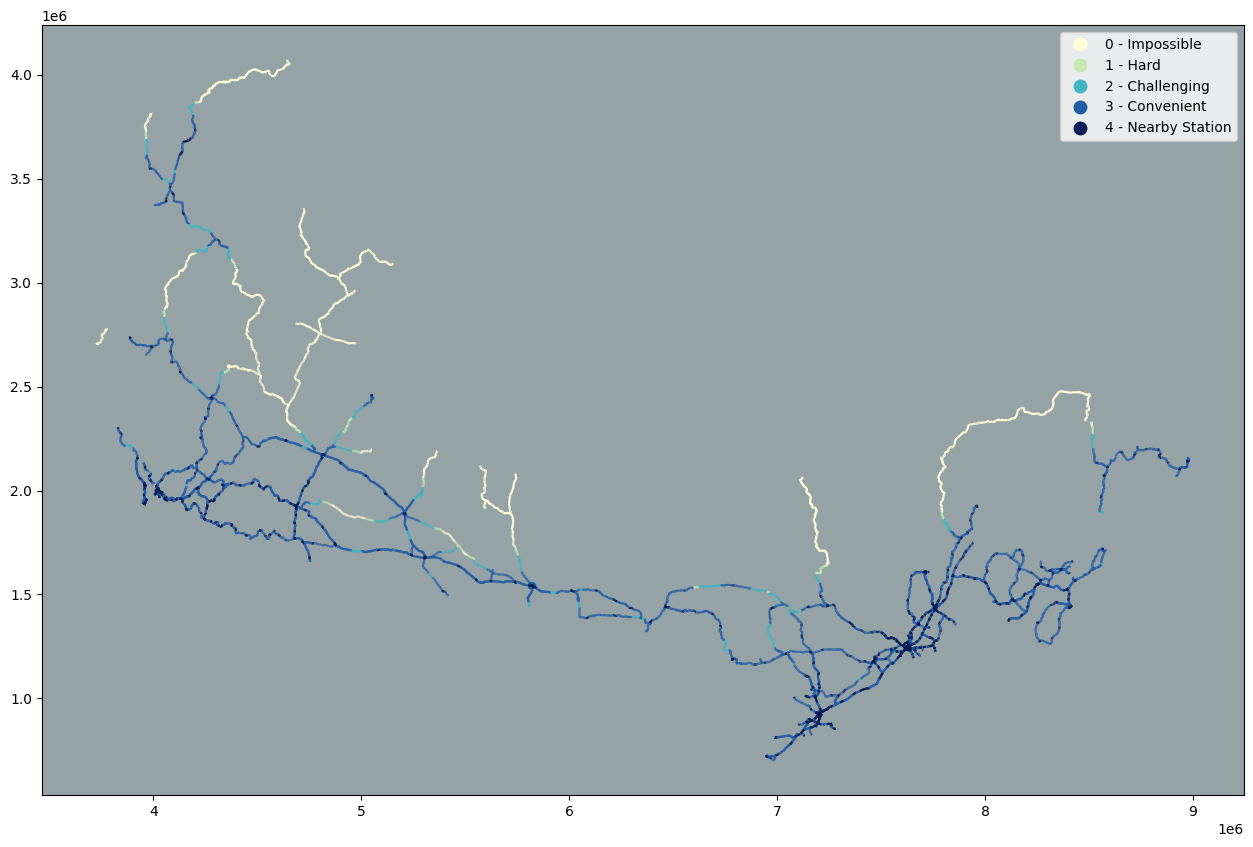

In [322]:
ev_highways['distance_cat'] = ev_highways['charger_distance'].apply(categorize_distance)
ev_highways.plot(column="distance_cat", legend=True, cmap="YlGnBu", figsize=(20, 10)).set_facecolor('xkcd:cool grey')

In [500]:
cmap = matplotlib.cm.get_cmap('YlGnBu_r')

axin1 = ax.inset_axes([0.8, 0.1, 0.15, 0.15])

t1 = ev_highways.copy()
t1["h_length"] = t1.length / 1000
t1.groupby(["distance_cat"])["h_length"].sum().plot(ax=axin1, kind="barh", color=[cmap(0), cmap(1/5), cmap(2/5), cmap(3/5), cmap(4/5), cmap(5/5)], edgecolor="gray")

<Axes:label='inset_axes', ylabel='distance_cat'>

In [ ]:
# new_stations
# Yorkton


new_stations_df = pd.DataFrame({
    'City': ['Yorkton', 'Kapuskasing (Coming Soon)', 'Grande Prairie', 'Whitecourt', 'Boyle', 'Minnedosa', 'Prince Albert (??)', 'McCleod Lake (Coming Soon)', 'Hanna', 'Kindersley', 'St. Barbe'],
    'Province': ['SK', 'ON', 'AB', 'AB', 'AB', 'MB', 'SK', 'BC', 'AB', 'SK', 'NL'],
    'Latitude': [51.210516, 49.413051, 55.171337, 54.137583, 54.587165, 50.246068, 53.199422, 54.991843, 51.634314, 51.474346, 51.186568],
    'Longitude': [-102.448397, -82.419535, -118.821136, -115.686344, , -112.803389, -99.839088, -105.759733, -123.034198, -111.942042, -109.168040, -56.779044],
    'Population': [16343, 8292, 63166, 9721, 845, 2449, 35926, 94, 2559, 4597, 135],
})

new_stations = geopandas.GeoDataFrame(new_stations_df, geometry=geopandas.points_from_xy(new_stations_df.Longitude, new_stations_df.Latitude))


In [ ]:
new_stations_df = pd.DataFrame({
    'City': ['Yorkton', 'Kapuskasing (Coming Soon)', 'Grande Prairie', 'Whitecourt', 'Boyle', 'Minnedosa', 'Prince Albert (??)', 'McCleod Lake (Coming Soon)', 'Hanna', 'Kindersley', 'St. Barbe'],
    'Province': ['SK', 'ON', 'AB', 'AB', 'AB', 'MB', 'SK', 'BC', 'AB', 'SK', 'NL'],
    'Latitude': [51.210516, 49.413051, 55.171337, 54.137583, 54.587165, 50.246068, 53.199422, 54.991843, 51.634314, 51.474346, 51.186568],
    'Longitude': [-102.448397, -82.419535, -118.821136, -115.686344, , -112.803389, -99.839088, -105.759733, -123.034198, -111.942042, -109.168040, -56.779044],
    'Population': [16343, 8292, 63166, 9721, 845, 2449, 35926, 94, 2559, 4597, 135],
})